# Gaia
## Real data!

gully  
Sept 14, 2016

### Outline:

1. Download the data
2. Estimate how much data it will be
3. Batch download more

### 1. Download the data

In [7]:
! wget 'http://cdn.gea.esac.esa.int/Gaia/gaia_source/csv/GaiaSource_000-000-001.csv.gz'

--2016-09-14 18:42:56--  http://cdn.gea.esac.esa.int/Gaia/gaia_source/csv/GaiaSource_000-000-001.csv.gz
Resolving cdn.gea.esac.esa.int... 43.245.63.28
Connecting to cdn.gea.esac.esa.int|43.245.63.28|:80... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Wed, 14 Sep 2016 10:42:57 GMT
  Content-Type: application/octet-stream
  Content-Length: 41602593
  Connection: keep-alive
  Last-Modified: Wed, 07 Sep 2016 16:47:56 GMT
  ETag: "57d044bc-27ace21"
  Access-Control-Allow-Origin: *
  Server: CDN77-Turbo
  X-Edge-IP: 43.245.63.27
  X-Edge-Location: hongkongHK
  X-Cache: MISS
  Accept-Ranges: bytes
Length: 41602593 (40M) [application/octet-stream]
Saving to: 'GaiaSource_000-000-001.csv.gz'

GaiaSource_000-000- 100%[===================>]  39.67M   430KB/s    in 47s     

2016-09-14 18:43:44 (870 KB/s) - 'GaiaSource_000-000-001.csv.gz' saved [41602593/41602593]



In [9]:
! ls

GaiaSource_000-000-000.csv
GaiaSource_000-000-001.csv.gz
Untitled.ipynb
ad_overview.ipynb
adrasteia_01-gum_mw_sample.ipynb
adrasteia_02-03_get_real_gaia_data.ipynb
asrasteia_02_01_sept2016_fake_data.ipynb
asrasteia_02_02_sept2016_fake_data_postage_stamps.ipynb


In [5]:
! gzip -d GaiaSource_000-000-000.csv.gz

### 2. Estimate how much data it will be

In [10]:
! du -hs GaiaSource_*

 98M	GaiaSource_000-000-000.csv
 40M	GaiaSource_000-000-001.csv.gz


Wow, 100 Mb csv file... There are 20 groups of 256 files plus 111 extra files.

In [11]:
20*256+111

5231

In [13]:
5231*98/1000.0

512.638

In [15]:
import pandas as pd

In [19]:
%time g000 = pd.read_csv('GaiaSource_000-000-000.csv')

CPU times: user 2.02 s, sys: 144 ms, total: 2.17 s
Wall time: 2.17 s


In [22]:
g000.columns

Index(['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac',
       'astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'astrometric_relegation_factor', 'astrometric_weight_al',
       'astrometric_weight_ac', 'astrometric_priors_used',
       'matched_observations', 'duplicated_source',
       'scan_direction_strength_k1', 'scan_direction_strength_k2',
       'scan_direction_strength_k3', 'scan_direction_st

In [23]:
len(g000)

218453

In [27]:
p_i = g000.parallax == g000.parallax
p000 = g000[p_i]

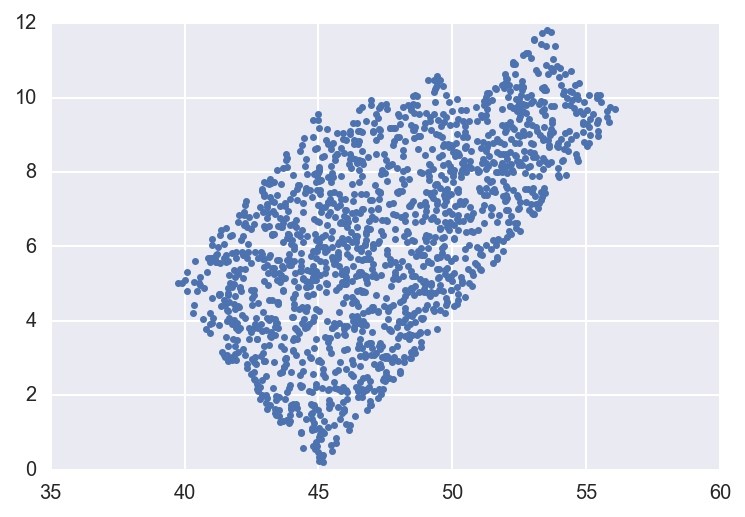

In [31]:
plt.plot(p000.ra, p000.dec, '.')

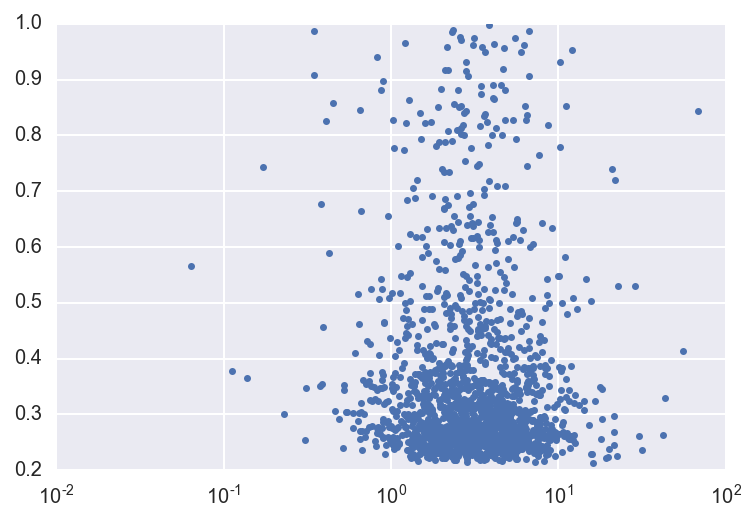

In [34]:
plt.plot(p000.parallax, p000.parallax_error, '.')
plt.xscale('log')

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


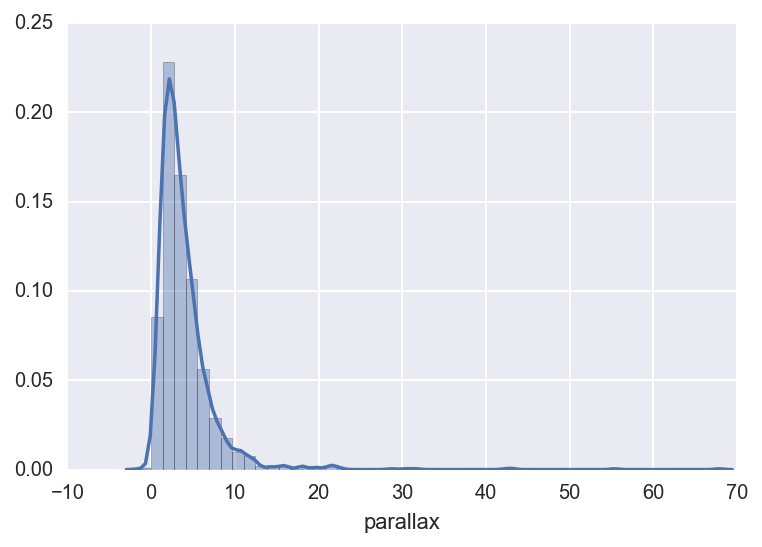

In [35]:
sns.distplot(p000.parallax)

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


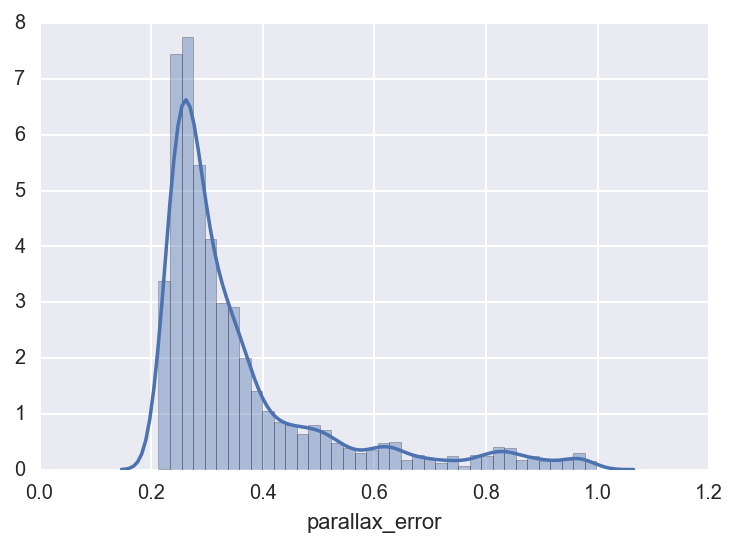

In [36]:
sns.distplot(p000.parallax_error)

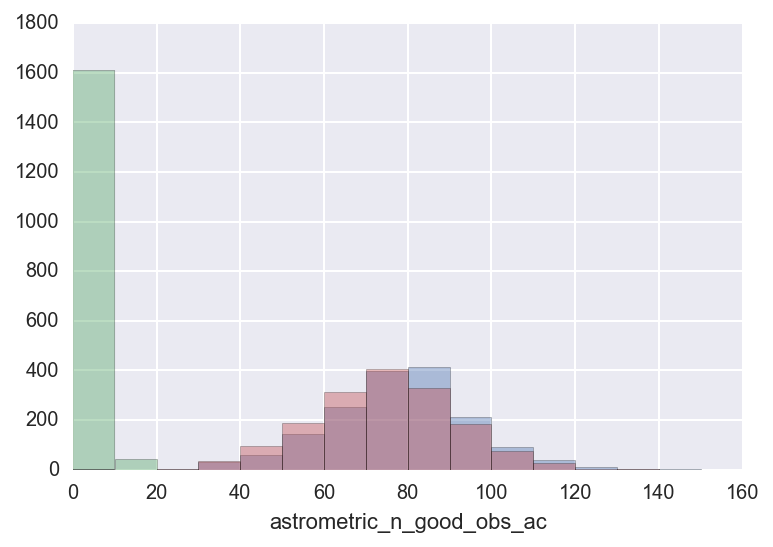

In [43]:
bins = np.arange(0, 160, 10)
sns.distplot(p000.astrometric_n_obs_ac, bins=bins, kde=False)
sns.distplot(p000.astrometric_n_bad_obs_ac, bins=bins, kde=False)
sns.distplot(p000.astrometric_n_good_obs_ac, bins=bins, kde=False)

In [54]:
#bins = np.arange(0, 160, 10)
#sns.distplot(p000.astrometric_n_obs_al, bins=bins, kde=False)
#sns.distplot(p000.astrometric_n_bad_obs_al, bins=bins, kde=False)
#sns.distplot(p000.astrometric_n_good_obs_al, bins=bins, kde=False)

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


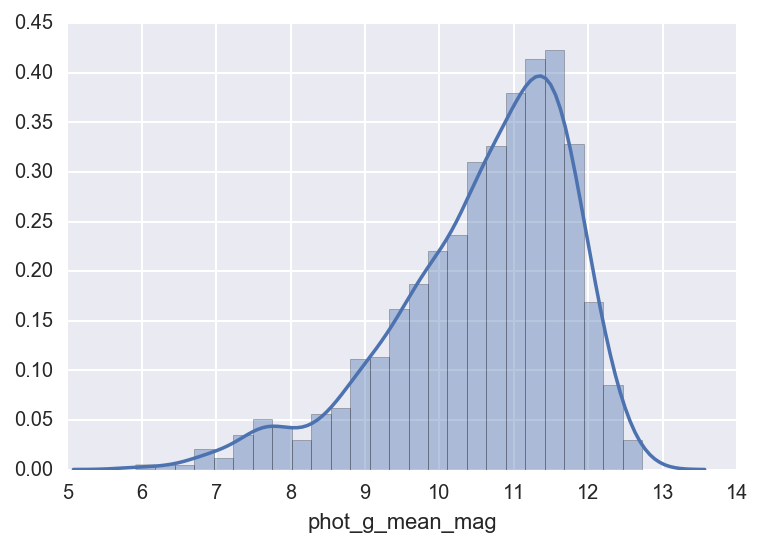

In [48]:
sns.distplot(p000.phot_g_mean_mag)

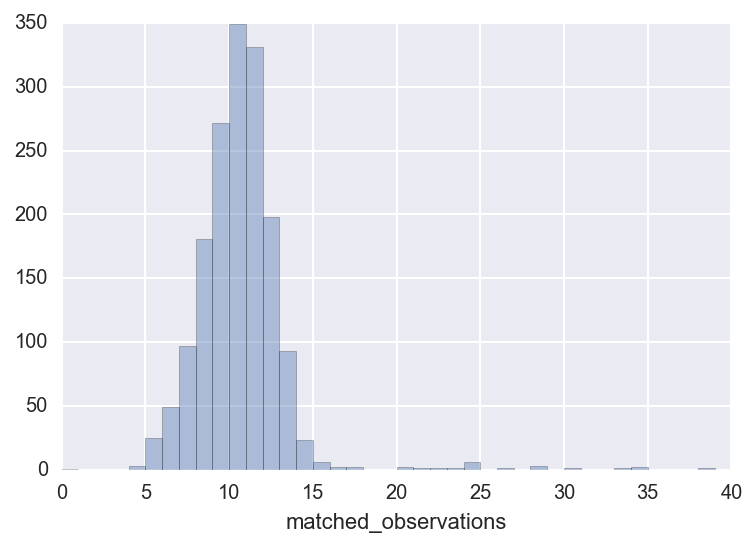

In [53]:
bins = np.arange(0,40,1)
sns.distplot(p000.matched_observations, bins=bins,kde=False)

In [29]:
p000.count()

solution_id                      1651
source_id                        1651
random_index                     1651
ref_epoch                        1651
ra                               1651
ra_error                         1651
dec                              1651
dec_error                        1651
parallax                         1651
parallax_error                   1651
pmra                             1651
pmra_error                       1651
pmdec                            1651
pmdec_error                      1651
ra_dec_corr                      1651
ra_parallax_corr                 1651
ra_pmra_corr                     1651
ra_pmdec_corr                    1651
dec_parallax_corr                1651
dec_pmra_corr                    1651
dec_pmdec_corr                   1651
parallax_pmra_corr               1651
parallax_pmdec_corr              1651
pmra_pmdec_corr                  1651
astrometric_n_obs_al             1651
astrometric_n_obs_ac             1651
astrometric_

In [57]:
p000.iloc[0]

solution_id                      1635378410781933568
source_id                              7627862074752
random_index                               883950605
ref_epoch                                       2015
ra                                           45.0343
ra_error                                    0.305989
dec                                         0.235392
dec_error                                   0.218802
parallax                                     6.35295
parallax_error                               0.30791
pmra                                         43.7523
pmra_error                                 0.0705422
pmdec                                       -7.64199
pmdec_error                                0.0874018
ra_dec_corr                                -0.414972
ra_parallax_corr                            0.179966
ra_pmra_corr                                0.159207
ra_pmdec_corr                             -0.0857597
dec_parallax_corr                          -0.